In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.impute import SimpleImputer
# imputer fills missing values in the data

X = np.array([
    [1,2,np.nan],
    [4,np.nan,6],
    [7,8,9]
])

#create the imputer: replace NaN with column means
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

#fit on columns 1 and 2 (i.e.,column index 1 and 2)
imputer.fit(X[:, 1:3])

#transform the data
X[:,1:3] = imputer.transform(X[:, 1:3])

print(X)

[[1.  2.  7.5]
 [4.  5.  6. ]
 [7.  8.  9. ]]


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

#Sample catagorical data

X = np.array([
    ["France",44,72000],
    ["Germany",27,48000],
    ["Spain",30,54000],
    ["France",38,61000],
    ["Germany",40,63777],
    ["Spain",35,58000],
    ["France",48,79000],
    ["Germany",50,83000],
    ["Spain", 37,67000]
])

#apply OneHotEncoder to column 0 (country)
ct = ColumnTransformer(
    transformers=[("encoder",OneHotEncoder(),[0])],
    remainder="passthrough"
)

X = ct.fit_transform(X)
print(X)

[['1.0' '0.0' '0.0' '44' '72000']
 ['0.0' '1.0' '0.0' '27' '48000']
 ['0.0' '0.0' '1.0' '30' '54000']
 ['1.0' '0.0' '0.0' '38' '61000']
 ['0.0' '1.0' '0.0' '40' '63777']
 ['0.0' '0.0' '1.0' '35' '58000']
 ['1.0' '0.0' '0.0' '48' '79000']
 ['0.0' '1.0' '0.0' '50' '83000']
 ['0.0' '0.0' '1.0' '37' '67000']]


In [ ]:

from sklearn.compose import ColumnTransformer

#Example input features (X) and target labels (Y)
X = np.array([
    ["France",44,72000],
    ["Germany",27,48000],
    ["Spain",30,54000]
])
#is_France = 1
#is_Germany = 0
#is_Spain = 0

Y=np.array(["Yes","No","Yes"])

#OneHotEncode column 0 (Country)
ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(),[0])],
    remainder="passthrough" #keep other columns
)
X = ct.fit_transform(X)

#LabelEncode the output Y (Yes/No -> 1/0)
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size = 0.2, random_state=0
)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

#fit the scaler only on the training set
X_train = sc_X.fit_transform(X_train)

#Applay the same scaling (same mean and std) to the test set
X_test = sc_X.transform(X_test)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("studentscores.csv")
X = dataset.iloc[:,:1].values
Y = dataset.iloc[:,1].values

X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_prod = regressor.predict(X_test)

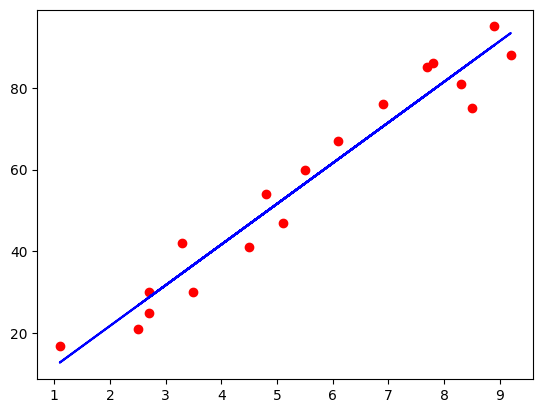

In [ ]:
plt.scatter(X_train,Y_train,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_test,Y_test)

LinearRegression()

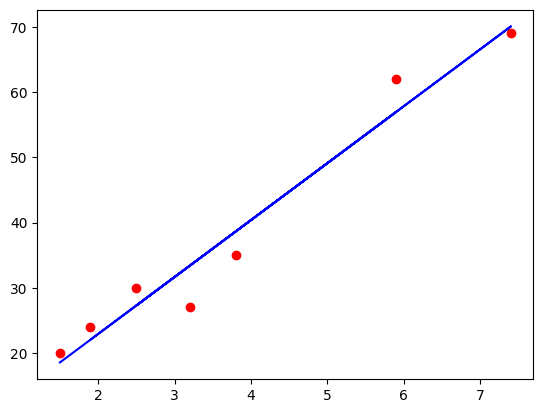

In [ ]:
plt.scatter(X_test,Y_test,color="red")
plt.plot(X_test,regressor.predict(X_test),color="blue")
plt.show()

In [ ]:
dataset = pd.read_csv("50_Startups.csv")
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[:,4].values




In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [ ]:
X=X[:,1:]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0
)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159795, 132582.27760816, 132447.73845175,  71976.09851258,
       178537.48221057, 116161.24230167,  67851.69209676,  98791.73374687,
       113969.43533014, 167921.06569552])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:,4].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(
    X, Y, test_size=0.25,random_state=0
)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)



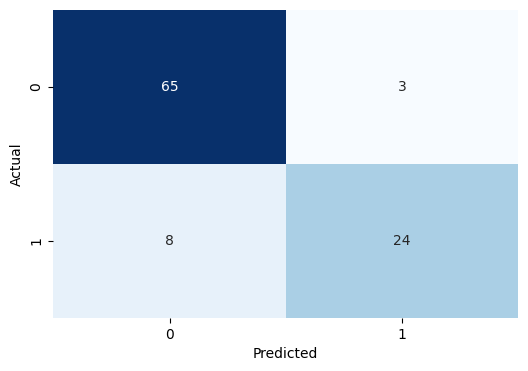

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(Y_test,Y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5,1.5],["0","1"])
plt.yticks([0.5,1.5],["0","1"])
plt.show()